# CSMODEL Machine Project

This Jupyter notebook presents a comprehensive analysis of the [Family Income and Expenditure Survey 2012 Vol. 1](https://psada.psa.gov.ph/auth/register) dataset from the Philippine Statistics Authority (PSA).

The goal of the project is to explore how **socioeconomic and demographic factors** may be associated with the **expenditure patterns** of Filipino households in 2012.

**Research Question**
1. [How are socioeconomic and demographic factors associated with the expenditure patterns of Filipino households in 2012?](#how-are-socioeconomic-and-demographic-factors-associated-with-the-expenditure-patterns-of-filipino-households-in-2012)

**Exploratory Data Analysis (EDA) Questions**
1. [How does the proportion of spending across **major expenditure categories** vary based on various **socioeconomic and demographic factors**?](#1-how-does-the-proportion-of-spending-across-major-expenditure-categories-vary-based-on-various-socioeconomic-and-demographic-factors)
2. [Which regions spend the highest proportion of their **food expenditure** on various **food categories**?](#2-which-regions-spend-the-highest-proportion-of-their-food-expenditure-on-various-food-categories-eg-vegetables-meats)
3. [Is there a correlation between **total household income** and the proportion of food expenditure spent on **food consumed outside the home**?](#3-is-there-a-correlation-between-total-household-income-and-the-proportion-of-food-expenditure-spent-on-food-consumed-outside-the-home)
4. [How does **housing expenditure** differ between **urban** and **rural** households?](#4-how-does-housing-expenditure-differ-between-urban-and-rural-households)
5. [Is there a correlation between **total household income** and **education-related expenditures**?](#5-is-there-a-correlation-between-total-household-income-and-education-related-expenditures)

## Authors

The following students of De La Salle University - Manila, Philippines collaborated on this project:

<table>
  <thead>
    <tr>
      <th>Profile</th>
      <th>Author</th>
      <th>Contributions</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td align="center">
        <img src="https://github.com/qu1r0ra.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Christian Joseph Bunyi</strong>
        <br />
        <a href="https://github.com/qu1r0ra">@qu1r0ra</a>
      </td>
      <td>
        <ul>
          <li>Created and maintained the GitHub repository and the Jupyter notebook</li>
          <li>Constructed the research question</li>
          <li>Constructed EDA questions 1, 2, and 3</li>
          <li>Performed data cleaning and preprocessing (Section II)</li>
          <li>Performed EDA on EDA questions 1 and 2 (Section III)</li>
          <li>Wrote introductory and skeletal Markdown (Introduction, Authors, etc.)</li>
          <li>Wrote Markdown for Sections II and III</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/kelliekaw.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Kellie Kaw</strong>
        <br />
        <a href="https://github.com/kelliekaw">@kelliekaw</a>
      </td>
      <td>
        <ul>
          <li>[indicate contributions here]</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/JohnathanTantanan.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Lance Xavier Lim</strong>
        <br />
        <a href="https://github.com/JohnathanTantanan">@JohnathanTantanan</a>
      </td>
      <td>
        <ul>
          <li>[indicate contributions here]</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td align="center">
        <img src="https://github.com/jstnsy.png" width="50" height="50" style="border-radius: 50%;" />
      </td>
      <td>
        <strong>Justin John Abraham Sy</strong>
        <br />
        <a href="https://github.com/jstnsy">@jstnsy</a>
      </td>
      <td>
        <ul>
          <li>[indicate contributions here]</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

## I. Dataset

```
Note from CJ: Employ a first person, narrative tone--as if we're guiding readers along the notebook.
```

### Description (Justin)

>[write stuff]

### Data collection method (Justin)

>[write stuff]

### Structure (Kellie)

>[write stuff]

## II. Data Cleaning and Preprocessing (Lance and CJ)

Now that we have a good understanding of the dataset and how it was collected, we can proceed with cleaning and preprocessing it.

Cleaning the data is crucial to avoid errors or unexpected results later on, which may result from data that is inconsistent, incorrect, missing, etc.

First, let us import all the Python libraries and modules which we will be using throughout the notebook. Brief descriptions of the purpose of each library/module are indicated as comments.

In [163]:
import matplotlib.pyplot as plt     # brief description of purpose
import numpy as np                  # brief description of purpose
import pandas as pd                 # brief description of purpose
import seaborn as sns               # brief description of purpose

Next, we load the dataset from a `.csv` file. The **pandas** library is ideal for this as it optimized for handling tabular data like that from the survey.

In [164]:
df = pd.read_csv('data/FIES_PUF_2012_Vol_1.csv')

It's good practice to view high level information of a dataset when looking at it the first time. `df.info()` allows us to do so.

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(5), int64(92), object(22)
memory usage: 36.5+ MB


From `df.info()`, we learn that the dataset indeed contains $40171$ entries or rows or **observations** and $119$ columns or **attributes**.

We also learn that:
- $5$ attributes are of datatype float64
- $92$ attributes are of datatype int64
- $22$ attributes are of datatype object

It also helps looking at some sample observations to see how data is structured and encoded. `df.head()` allows us to do so.

In [166]:
df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,01,01,,,0.946172,108417.00,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,,01,,01,0.946172,30631.60,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,,01,,,0.946172,86992.50,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,,01,,,0.946172,43325.75,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,,,,01,0.946172,37481.80,6,6,6,5


From `df.head()`, we learn that the dataset's attribute names follow some coding scheme which does not clearly convey their meaning. This is not a problem, as we can refer to the **metadata dictionary** provided along with the dataset. Short descriptions of each attribute can also be seen in [Section I](#structure-kellie).

<br>

Next, we will drop unnecessary attributes. This step is dependent on our [research question](#research-question) and [EDA questions](#eda-questions) as they determine which variables are needed and which ones are irrelevant given the scope our EDA.

>**Note:**
>From this point onward, the authors used the [Data Wrangler](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler) extension in Visual Studio Code to make data cleaning easier.

>[dropping columns explanation]

In [167]:
# Drop columns: 'W_OID', 'W_SHSN' and 80 other columns
df = df.drop(columns=['W_OID', 'W_SHSN', 'W_HCN', 'RSTR', 'PSU', 'RFACT', 'BWEIGHT', 'FSIZE', 'AGRI_SAL', 'NONAGRI_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'NET_LPR', 'NET_CFG', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_COM', 'NET_TRANS', 'NET_MIN', 'NET_CONS', 'NET_NEC', 'EAINC', 'LOSSES', 'T_ACTRENT', 'T_RENTVAL', 'T_IMPUTED_RENT', 'T_BIMPUTED_RENT', 'T_OTHREC', 'T_TOREC', 'FOOD_ACCOM_SRVC', 'MS', 'JOB', 'OCCUP', 'KB', 'CW', 'HHTYPE', 'MEMBERS', 'AGELESS5', 'AGE5_17', 'EMPLOYED_PAY', 'EMPLOYED_PROF', 'SPOUSE_EMP', 'BLDG_TYPE', 'ROOF', 'WALLS', 'TENURE', 'HSE_ALTERTN', 'TOILET', 'ELECTRIC', 'WATER', 'DISTANCE', 'RADIO_QTY', 'TV_QTY', 'CD_QTY', 'STEREO_QTY', 'REF_QTY', 'WASH_QTY', 'AIRCON_QTY', 'CAR_QTY', 'LANDLINE_QTY', 'CELLPHONE_QTY', 'PC_QTY', 'OVEN_QTY', 'MOTOR_BANCA_QTY', 'MOTORCYCLE_QTY', 'POP_ADJ', 'PCINC', 'NATPC', 'REGDC', 'REGPC']);

In [168]:
# TODO: For debugging!
df.head()

,W_REGN,URB,TOINC,T_BREAD,T_MEAT,T_FISH,T_MILK,T_OIL,T_FRUIT,T_VEG,...,T_MISCELLANEOUS,T_OTHER_EXPENDITURE,T_OTHER_DISBURSEMENT,T_NFOOD,T_TOTEX,T_TOTDIS,SEX,AGE,HGC,NATDC
0,14,2,325251,30263,29374,5204,3533,2136,2129,6517,...,18636,260,0,198916,313269,313269,2,75,280,8
1,14,2,382895,97693,5820,28836,14484,3016,1230,7885,...,10260,0,0,61108,246625,246625,1,48,250,9
2,14,2,173985,14699,13457,7811,1222,1788,2610,5560,...,10224,1615,5000,86321,140966,145966,1,55,552,6
3,14,2,173303,27846,7787,5106,4112,1713,1530,5435,...,10020,15,0,84601,156661,156661,1,44,830,6
4,14,2,187409,29573,11704,8765,4056,1138,1385,4250,...,5274,0,0,108002,179855,179855,1,42,350,6


>[converting numerical values to categorical values explanation]

In [169]:

# Change column type to string for columns: 'W_REGN', 'URB' and 1 other column
df = df.astype({'W_REGN': 'string', 'URB': 'string', 'SEX': 'string'});

# Replace all instances of "41" with "4A" in column: 'W_REGN'
df.loc[df['W_REGN'].str.lower() == "41".lower(), 'W_REGN'] = "4A"

# Replace all instances of "42" with "4B" in column: 'W_REGN'
df.loc[df['W_REGN'].str.lower() == "42".lower(), 'W_REGN'] = "4B"

# Replace all instances of "1" with "Urban" in column: 'URB'
df.loc[df['URB'].str.lower() == "1".lower(), 'URB'] = "Urban"

# Replace all instances of "2" with "Rural" in column: 'URB'
df.loc[df['URB'].str.lower() == "2".lower(), 'URB'] = "Rural"

# Replace all instances of "1" with "Male" in column: 'SEX'
df.loc[df['SEX'].str.lower() == "1".lower(), 'SEX'] = "Male"

# Replace all instances of "2" with "Female" in column: 'SEX'
df.loc[df['SEX'].str.lower() == "2".lower(), 'SEX'] = "Female"

In [170]:
# TODO: For debugging!
df.head()

,W_REGN,URB,TOINC,T_BREAD,T_MEAT,T_FISH,T_MILK,T_OIL,T_FRUIT,T_VEG,...,T_MISCELLANEOUS,T_OTHER_EXPENDITURE,T_OTHER_DISBURSEMENT,T_NFOOD,T_TOTEX,T_TOTDIS,SEX,AGE,HGC,NATDC
0,14,Rural,325251,30263,29374,5204,3533,2136,2129,6517,...,18636,260,0,198916,313269,313269,Female,75,280,8
1,14,Rural,382895,97693,5820,28836,14484,3016,1230,7885,...,10260,0,0,61108,246625,246625,Male,48,250,9
2,14,Rural,173985,14699,13457,7811,1222,1788,2610,5560,...,10224,1615,5000,86321,140966,145966,Male,55,552,6
3,14,Rural,173303,27846,7787,5106,4112,1713,1530,5435,...,10020,15,0,84601,156661,156661,Male,44,830,6
4,14,Rural,187409,29573,11704,8765,4056,1138,1385,4250,...,5274,0,0,108002,179855,179855,Male,42,350,6


>[dropping duplicate values explanation]

In [171]:
df.duplicated().sum()       # Number of duplicate observations

0

Fortunately, we have no duplicate observations.

>[checking for null values explanation]

In [172]:
num_na_per_attribute = df.isna().sum()
num_na_per_attribute = num_na_per_attribute.sort_values(ascending=False)

print(num_na_per_attribute)

W_REGN                  0
URB                     0
TOINC                   0
T_BREAD                 0
T_MEAT                  0
T_FISH                  0
T_MILK                  0
T_OIL                   0
T_FRUIT                 0
T_VEG                   0
T_SUGAR                 0
T_FOOD_NEC              0
T_COFFEE                0
T_MINERAL               0
T_ALCOHOL               0
T_TOBACCO               0
T_OTHER_VEG             0
T_FOOD_HOME             0
T_FOOD_OUTSIDE          0
T_FOOD                  0
T_CLOTH                 0
T_FURNISHING            0
T_HEALTH                0
T_HOUSING_WATER         0
T_TRANSPORT             0
T_COMMUNICATION         0
T_RECREATION            0
T_EDUCATION             0
T_MISCELLANEOUS         0
T_OTHER_EXPENDITURE     0
T_OTHER_DISBURSEMENT    0
T_NFOOD                 0
T_TOTEX                 0
T_TOTDIS                0
SEX                     0
AGE                     0
HGC                     0
NATDC                   0
dtype: int64

From this, we learn that the dataset **does not have any missing values**. We can also choose to leave values of 0 for various expenditure categories as it can be the case that the household does not spend any amount for a particular category. We can only trust that the figures provided by each household are accurate to a significant extent and that the values are encoded by PSA without error.

However, to check for *possible* outliers and to satisfy early curiosity, we shall take the liberty to check the distribution of each **atomic** numerical attribute. We won't check aggregate numerical attributes anymore on the assumption that they are summations of a set of atomic numerical attributes.

For this, we can create a **boxplot** for each attribute, as it is a convenient, summarized way of checking how a group of numerical data may be distributed. Moreover, since all attributes of interest fall within the same range [$0$ to $10^9$], we can group them together in the same graph to give us a high-level comparison of the distribution of various atomic expenditure categories.

Lastly, we will need to apply **log transformation** to the values due to their very wide range.

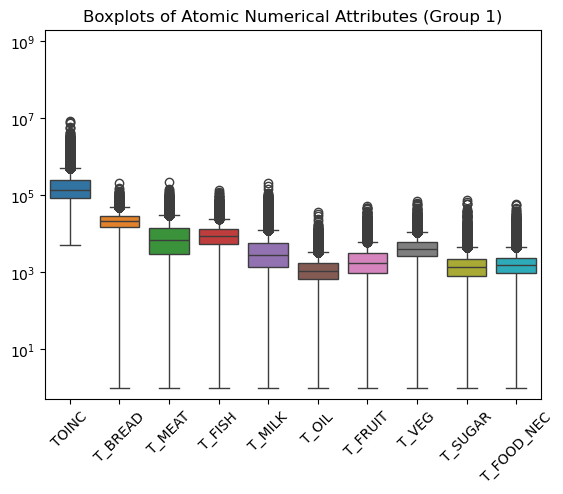

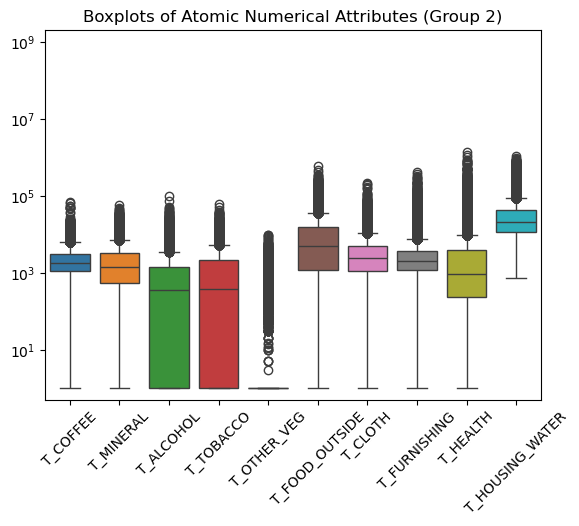

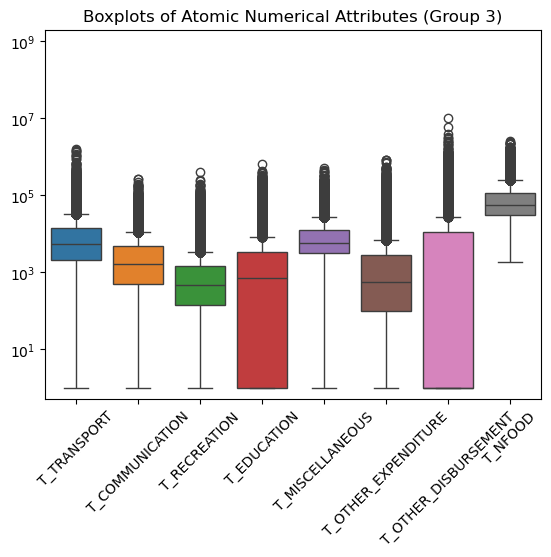

In [173]:
numerical_cols = [      # atomic numerical attributes of interest
    'TOINC', 'T_BREAD', 'T_MEAT', 'T_FISH', 'T_MILK',
    'T_OIL', 'T_FRUIT', 'T_VEG', 'T_SUGAR', 'T_FOOD_NEC',
    'T_COFFEE', 'T_MINERAL', 'T_ALCOHOL', 'T_TOBACCO', 'T_OTHER_VEG',
    'T_FOOD_OUTSIDE', 'T_CLOTH', 'T_FURNISHING', 'T_HEALTH', 'T_HOUSING_WATER',
    'T_TRANSPORT', 'T_COMMUNICATION', 'T_RECREATION', 'T_EDUCATION', 'T_MISCELLANEOUS',
    'T_OTHER_EXPENDITURE', 'T_OTHER_DISBURSEMENT', 'T_NFOOD'
]

GROUP_SIZE = 10     # number of attributes per plot

for i in range(0, len(numerical_cols), GROUP_SIZE):
    subset = numerical_cols[i:i+GROUP_SIZE]
    df_subset = df[subset].replace(0, 1)    # We replace 0s with 1s since 0 can't be viewed on a log transformation graph

    sns.boxplot(data=df_subset)
    plt.yscale("log")
    plt.ylim(1/2, 1e9 * 2)      # manually set the limit of the y-axis from slightly below 10^0 (or 1) to slightly above 10^9 (encoding limit)
    plt.xticks(rotation=45)
    plt.title(f"Boxplots of Atomic Numerical Attributes (Group {i//GROUP_SIZE + 1})")
    plt.show()



From these charts alone, we can already draw several insights about household expenditures (such as the first thing I noticed that somewhat surprised me, which is that **on average, a household in 2012 *may have* spent the most on the bread and cereals food category**, followed by **fish** then **meat**, both of which didn't even come close and were the food categories I expected instead to come out on top - CJ).

However, we only intend to check for possible outliers, so we shall not analyze any further. At first glance, it appears that there are lots of outliers for each atomic expenditure category, but that does not mean we can simply discard those observations. In fact, there isn't really any obvious 'extreme' outlier, as the outliers for each attribute are pretty spread out, hence the densely blackened areas. This *might* simply be indicative of a **significant disparity** in the higher expenditure amounts for each attribute.

Hence, we will not remove any observations and can reasonably conclude with the data cleaning process.

<br>

Now that we have cleaned the dataset, we can proceed to **preprocessing**, which entails applying necessary transformations (e.g., *feature engineering*, *encoding*, *normalization*, *standardization*) to prepare our data for [**exploratory data analysis (EDA)**](#iii-exploratory-data-analysis-eda).

First, we will do **feature engineering**, which is the creation of new features (or attributes) based on existing ones.

We want to create the ff. attributes which we will use for EDA:

*Computed Attributes*
- **PROP_FOOD_OUTSIDE** = T_FOOD_OUTSIDE / TFOOD
- **T_VICES** = T_ALCOHOL + T_TOBACCO
- **T_HOME** = T_FURNISHING + T_HOUSING_WATER

*Binned Attributes*
- **AGE_GROUP**: age group of the head of the household, binned from AGE (age of the household head)
- **HGC**: binned from HGC (highest grade completed)

<br>

>**Note:**
>Technically, we can choose not to create new features and instead compute for said values on the fly as we need them (as pandas makes it easy to perform vectorized operations, anyways). However, creating new features based on values we may need in the future makes it easier for us long-term and saves time from having to recompute them, especially when they are needed in multiple instances.

In [174]:
# computed attributes
df['PROP_FOOD_OUTSIDE'] = df['T_FOOD_OUTSIDE'] / df['T_FOOD']
df['T_VICES'] = df['T_ALCOHOL'] + df['T_TOBACCO']
df['T_HOME'] = df['T_FURNISHING'] + df['T_HOUSING_WATER']

In [175]:
# binned attributes

### AGE_GROUP ###
age_bins = [0, 29, 39, 49, 59, 120]
age_labels = ['Under 30', '30–39', '40–49', '50–59', '60+']

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)


### HGC (overwritten) ###
# The 'HGC - highest grade completed of the head of the family' codes are taken from the metadata dictionary.
def convert_hgc_code_to_string(code):
    exact_matches = {
        0: 'No Grade Completed',
        10: 'Preschool',
        280: 'Elementary Graduate',
        350: 'High School Graduate',
        900: 'Post Baccalaureate'
    }

    if code in exact_matches:
        return exact_matches[code]
    elif 210 <= code <= 260:
        return 'Elementary Undergraduate'
    elif 310 <= code <= 330:
        return 'High School Undergraduate'
    elif 410 <= code <= 420:
        return 'Post Secondary'
    elif 501 <= code <= 589:
        return 'Post Secondary / TechVoc Graduate'
    elif 810 <= code <= 840:
        return 'College Undergraduate'
    elif 601 <= code <= 689:
        return 'College Graduate'
    else:
        return 'N/A'

df['HGC'] = df['HGC'].apply(convert_hgc_code_to_string)

With all these changes, we may want to take another high-level view of our cleaned and preprocessed dataset.

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   W_REGN                40171 non-null  string  
 1   URB                   40171 non-null  string  
 2   TOINC                 40171 non-null  int64   
 3   T_BREAD               40171 non-null  int64   
 4   T_MEAT                40171 non-null  int64   
 5   T_FISH                40171 non-null  int64   
 6   T_MILK                40171 non-null  int64   
 7   T_OIL                 40171 non-null  int64   
 8   T_FRUIT               40171 non-null  int64   
 9   T_VEG                 40171 non-null  int64   
 10  T_SUGAR               40171 non-null  int64   
 11  T_FOOD_NEC            40171 non-null  int64   
 12  T_COFFEE              40171 non-null  int64   
 13  T_MINERAL             40171 non-null  int64   
 14  T_ALCOHOL             40171 non-null  int64   
 15  T_

In [177]:
df.head()

,W_REGN,URB,TOINC,T_BREAD,T_MEAT,T_FISH,T_MILK,T_OIL,T_FRUIT,T_VEG,...,T_TOTEX,T_TOTDIS,SEX,AGE,HGC,NATDC,PROP_FOOD_OUTSIDE,T_VICES,T_HOME,AGE_GROUP
0,14,Rural,325251,30263,29374,5204,3533,2136,2129,6517,...,313269,313269,Female,75,Elementary Graduate,8,0.204017,0,58726,60+
1,14,Rural,382895,97693,5820,28836,14484,3016,1230,7885,...,246625,246625,Male,48,Elementary Undergraduate,9,0.048109,2450,28796,40–49
2,14,Rural,173985,14699,13457,7811,1222,1788,2610,5560,...,140966,145966,Male,55,Post Secondary / TechVoc Graduate,6,0.027450,2070,43721,50–59
3,14,Rural,173303,27846,7787,5106,4112,1713,1530,5435,...,156661,156661,Male,44,College Undergraduate,6,0.154455,0,55262,40–49
4,14,Rural,187409,29573,11704,8765,4056,1138,1385,4250,...,179855,179855,Male,42,High School Graduate,6,0.072092,3588,73683,40–49


Looking great! We can now proceed with EDA.

## III. Exploratory Data Analysis

>[write stuff]

### Research Question

#### How are socioeconomic and demographic factors associated with the expenditure patterns of Filipino households in 2012?

>[write stuff]

### EDA Questions

>[write stuff]

#### 1. How does the proportion of spending across major expenditure categories vary based on various socioeconomic and demographic factors?

For this EDA question, we will be focusing on the ff. factors:

*Socioeconomic* factors
- National income decile of the household
- Education level of the household head

*Demographic* factors
- Region of the household
- Age group of the household head
- Sex of the household head

In [178]:
factors = {
    'National Income Decile of the Household'   : 'NATDC',
    'Education Level of the Household Head'     : 'HGC',
    'Region of the Household'                   : 'W_REGN',
    'Age Group of the Household Head'           : 'AGE_GROUP',
    'Sex of the Household Head'                 : 'SEX'
}

We will also be using the ff. major expenditure categories:

| Major Expenditure Category | Attribute Name |
|---|---|
| **Food** | T_FOOD |
| **Vices** | T_VICES (engineered) |
| **Clothing** | T_CLOTH |
| **Health** | T_HEALTH |
| **Home** | T_HOME (engineered) |
| **Transportation** | T_TRANSPORT |
| **Communication** | T_COMMUNICATION |
| **Recreation** | T_RECREATION |
| **Education** | T_EDUCATION |
| **Miscellaneous** | T_MISCELLANEOUS |
| **Other Expenditures** | T_OTHER_EXPENDITURE |
| **Non-Family Expenditures** | T_OTHER_DISBURSEMENT |

In [179]:
major_expenditure_categories = {
    'Food'                      : 'T_FOOD',
    'Vices'                     : 'T_VICES',
    'Clothing'                  : 'T_CLOTH',
    'Health'                    : 'T_HEALTH',
    'Home'                      : 'T_HOME',
    'Transportation'            : 'T_TRANSPORT',
    'Communication'             : 'T_COMMUNICATION',
    'Recreation'                : 'T_RECREATION',
    'Education'                 : 'T_EDUCATION',
    'Miscellaneous'             : 'T_MISCELLANEOUS',
    'Other Expenditures'        : 'T_OTHER_EXPENDITURE',
    'Non-Family Expenditures'   : 'T_OTHER_DISBURSEMENT'
}

We also want to define a generalized function that allows us to generate a **stacked bar chart**, which is great for comparing **breakdowns in proportion** across different groups.

In [180]:
# TODO: Revise this.

def plot_stacked_bar(
    df, group_col, category_dict, normalize=True, figsize=(10, 6), title=None, sort_groups=False
):
    """
    Plots a stacked bar chart showing breakdowns of categories across group values.

    Parameters:
    - df: DataFrame containing data
    - group_col: column to group by (e.g., 'REGION', 'INCOME_DECILE')
    - category_dict: dict of {label: column_name}, where labels are shown in legend
    - normalize: if True, shows proportions instead of raw totals
    - figsize: tuple for figure size
    - title: optional title for the chart
    - sort_groups: whether to sort groups by total
    """

    # Aggregate values per group
    data = df.groupby(group_col)[list(category_dict.values())].sum()

    # Normalize if needed
    if normalize:
        data = data.div(data.sum(axis=1), axis=0)

    # Sort if requested
    if sort_groups:
        data = data.sort_values(by=data.columns.tolist(), ascending=False)

    # Plot
    ax = data.plot(kind="bar", stacked=True, figsize=figsize, colormap="tab20")
    ax.set_title(title or f"Stacked Bar Chart by {group_col}")
    ax.set_ylabel("Proportion" if normalize else "Total Expenditure")
    ax.set_xlabel(group_col)
    ax.legend(title="Expenditure Category", labels=category_dict.keys(), bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


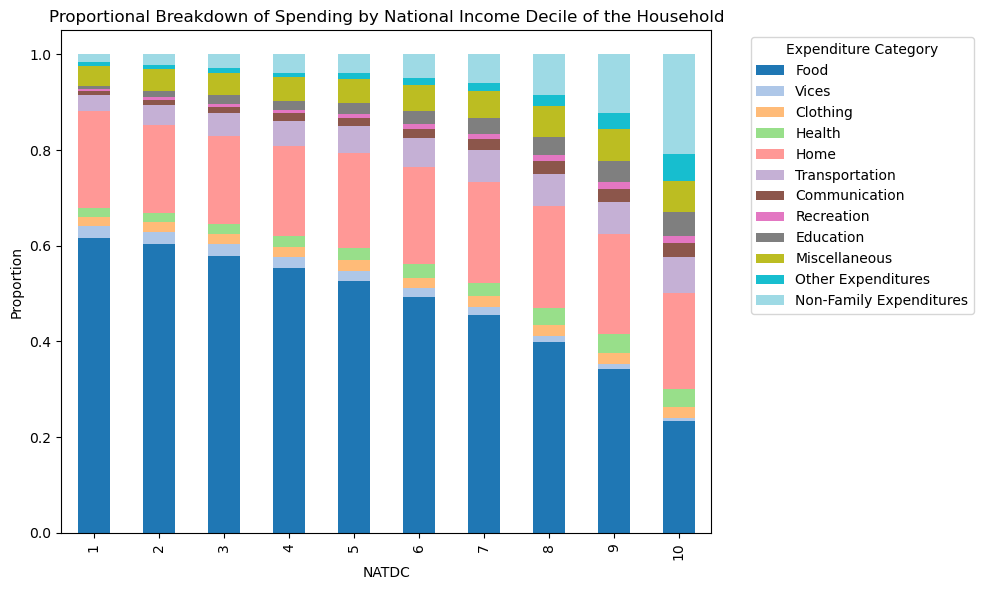

,Category,Group with Max %,Max %,Group with Min %,Min %
0,Food,1,61.68%,10,23.48%
1,Vices,1,2.47%,10,0.56%
2,Clothing,9,2.29%,1,1.94%
3,Health,10,3.89%,1,1.79%
4,Home,8,21.32%,2,18.33%
5,Transportation,10,7.61%,1,3.37%
6,Communication,10,2.83%,1,0.67%
7,Recreation,10,1.64%,1,0.45%
8,Education,10,4.94%,1,0.77%
9,Miscellaneous,9,6.67%,1,4.11%


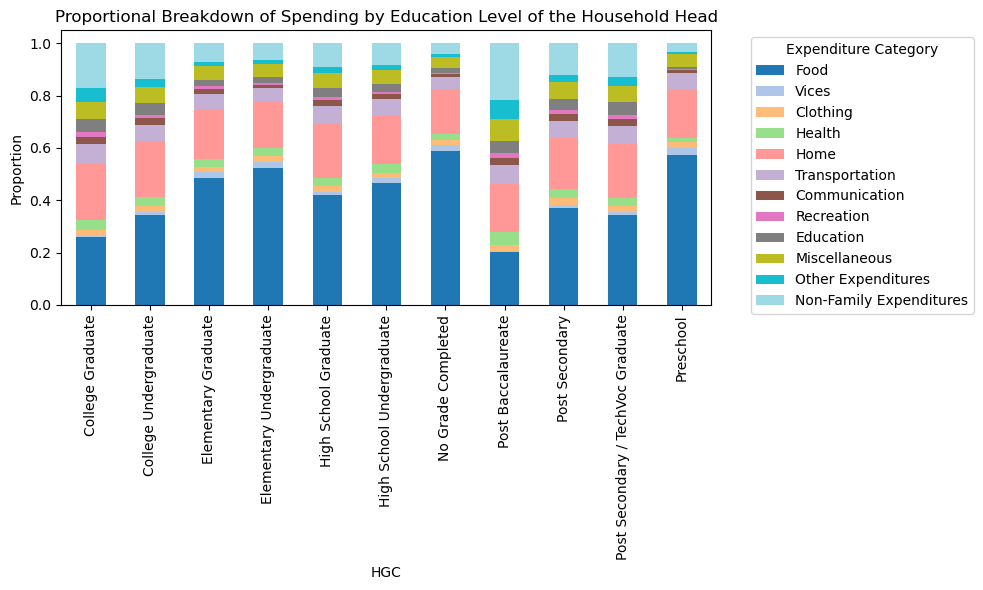

,Category,Group with Max %,Max %,Group with Min %,Min %
0,Food,No Grade Completed,58.93%,Post Baccalaureate,20.12%
1,Vices,Preschool,2.83%,Post Baccalaureate,0.36%
2,Clothing,Post Secondary,2.56%,No Grade Completed,2.04%
3,Health,Post Baccalaureate,4.77%,Preschool,1.46%
4,Home,College Graduate,21.75%,No Grade Completed,17.18%
5,Transportation,Post Baccalaureate,7.40%,No Grade Completed,4.48%
6,Communication,College Graduate,2.90%,No Grade Completed,1.06%
7,Recreation,Post Baccalaureate,1.91%,Preschool,0.42%
8,Education,College Graduate,4.99%,Preschool,0.62%
9,Miscellaneous,Post Baccalaureate,8.44%,No Grade Completed,4.15%


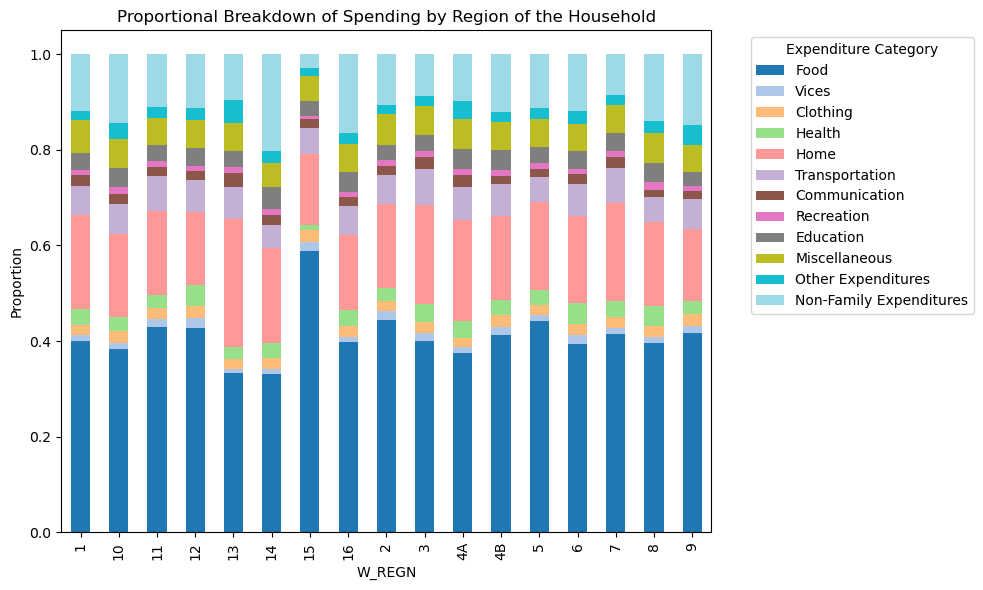

,Category,Group with Max %,Max %,Group with Min %,Min %
0,Food,15,58.79%,14,33.19%
1,Vices,12,1.95%,14,0.94%
2,Clothing,12,2.71%,13,1.95%
3,Health,6,4.41%,15,0.90%
4,Home,13,26.77%,15,14.93%
5,Transportation,3,7.55%,14,4.86%
6,Communication,13,2.91%,8,1.66%
7,Recreation,8,1.58%,15,0.47%
8,Education,14,4.62%,9,2.88%
9,Miscellaneous,1,6.86%,14,5.00%


/tmp/ipykernel_6287/368487713.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(group_col)[list(category_dict.values())].sum()


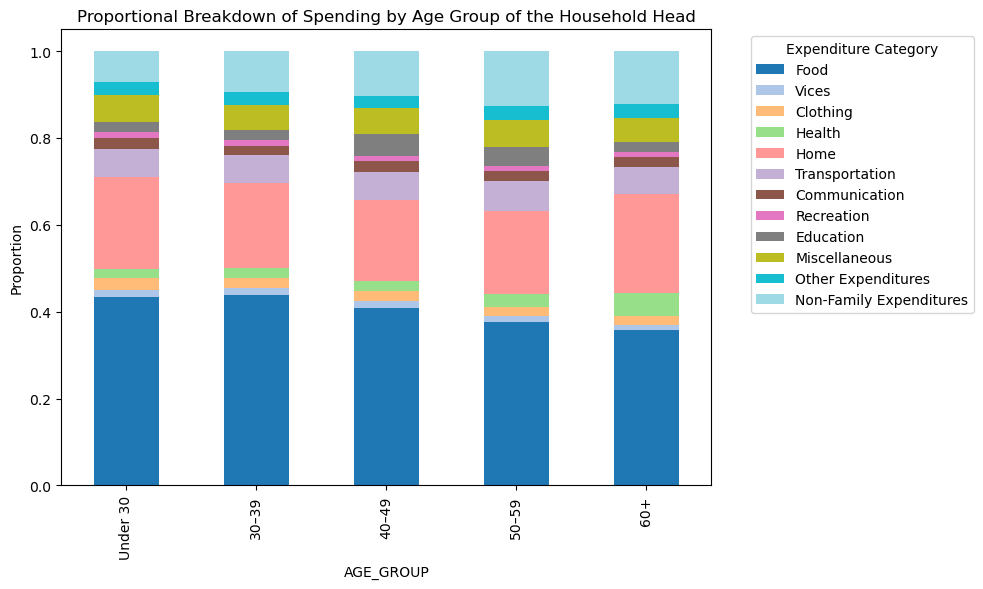

/tmp/ipykernel_6287/96800273.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(col)[list(major_expenditure_categories.values())].sum()


,Category,Group with Max %,Max %,Group with Min %,Min %
0,Food,30–39,43.91%,60+,35.89%
1,Vices,Under 30,1.59%,60+,1.12%
2,Clothing,Under 30,2.74%,60+,2.00%
3,Health,60+,5.24%,Under 30,2.10%
4,Home,60+,22.91%,40–49,18.67%
5,Transportation,50–59,6.81%,60+,6.13%
6,Communication,Under 30,2.55%,30–39,2.10%
7,Recreation,40–49,1.32%,60+,1.12%
8,Education,40–49,5.12%,30–39,2.36%
9,Miscellaneous,50–59,6.20%,60+,5.60%


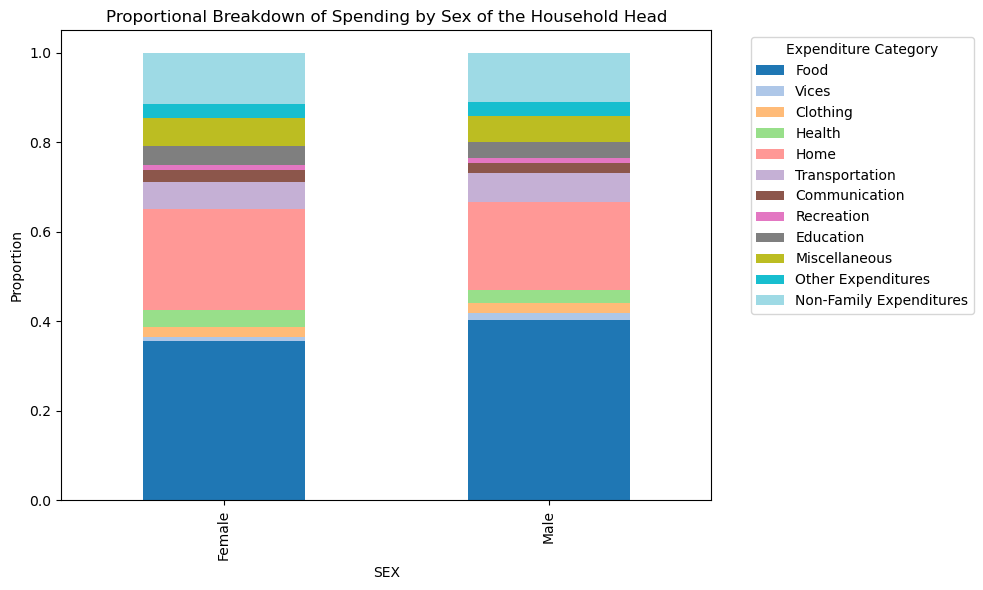

,Category,Group with Max %,Max %,Group with Min %,Min %
0,Food,Male,40.30%,Female,35.67%
1,Vices,Male,1.52%,Female,0.80%
2,Clothing,Male,2.22%,Female,2.17%
3,Health,Female,3.82%,Male,3.06%
4,Home,Female,22.59%,Male,19.46%
5,Transportation,Male,6.62%,Female,6.09%
6,Communication,Female,2.60%,Male,2.21%
7,Recreation,Female,1.27%,Male,1.20%
8,Education,Female,4.11%,Male,3.50%
9,Miscellaneous,Female,6.23%,Male,5.79%


In [ ]:
for title, col in factors.items():
    # Plot stacked bar chart
    plot_stacked_bar(
        df,
        group_col=col,
        category_dict=major_expenditure_categories,
        normalize=True,
        title=f"Proportional Breakdown of Spending by {title}"
    )

    # Compute proportion per group
    grouped = df.groupby(col)[list(major_expenditure_categories.values())].sum()
    proportions = grouped.div(grouped.sum(axis=1), axis=0)

    # Build summary of min/max per category
    summary = {
        "Category": [],
        "Group with Max %": [],
        "Max %": [],
        "Group with Min %": [],
        "Min %": []
    }

    for category, col_name in major_expenditure_categories.items():
        col_vals = proportions[col_name]
        summary["Category"].append(category)
        summary["Group with Max %"].append(col_vals.idxmax())
        summary["Max %"].append(col_vals.max())
        summary["Group with Min %"].append(col_vals.idxmin())
        summary["Min %"].append(col_vals.min())

    # Display table
    summary_df = pd.DataFrame(summary)
    display(summary_df.style.set_caption(f"Groups with Min/Max % per Category for {title}").format({'Max %': '{:.2%}', 'Min %': '{:.2%}'}))



>[interpretation]

#### 2. Which regions spend the highest proportion of their food expenditure on various food categories?

>[write stuff]

#### 3. Is there a correlation between total household income and the proportion of food expenditure spent on food consumed outside the home?

>[write stuff]

First, let us define a generalized function that allows us to generate a **scatterplot** for correlation.

In [182]:
def generate_scatter(data, x, y, log_x=False, log_y=False, title=None):
    sns.scatterplot(data=data, x=x, y=y)

    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    plt.title(title or f"{x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

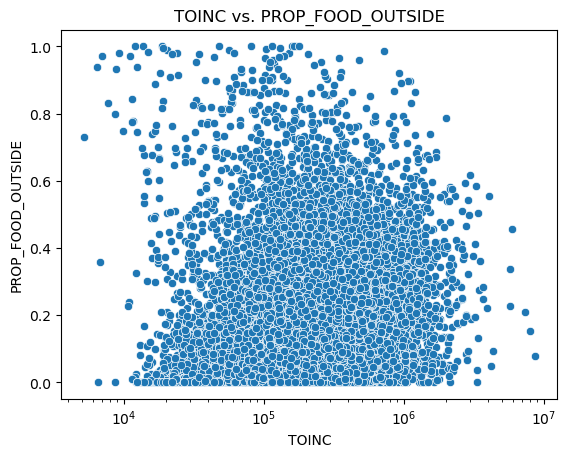

In [183]:
generate_scatter(df, 'TOINC', 'PROP_FOOD_OUTSIDE', log_x=True)

>not meaningful :\(

#### 4. Is there a correlation between total household income and any of the major expenditure categories?

>[write stuff]

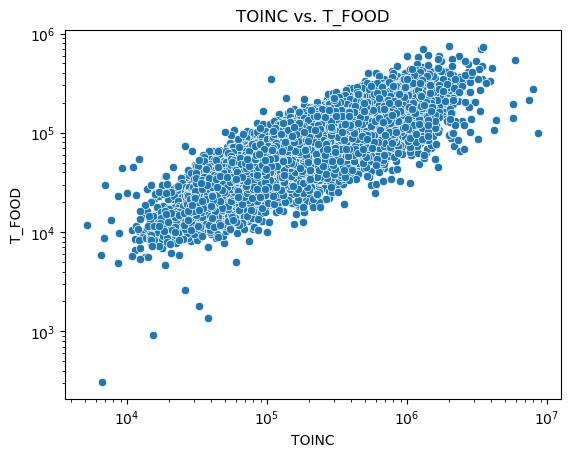

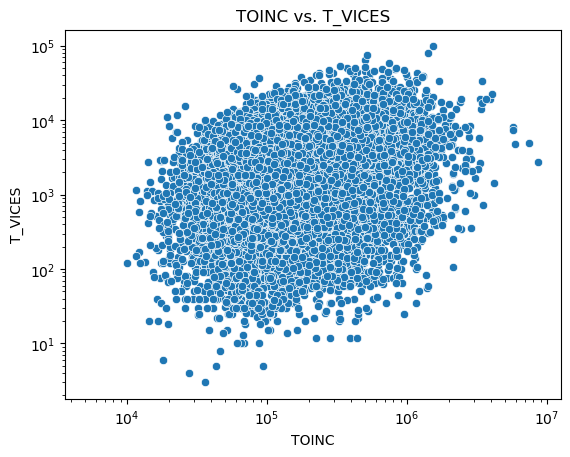

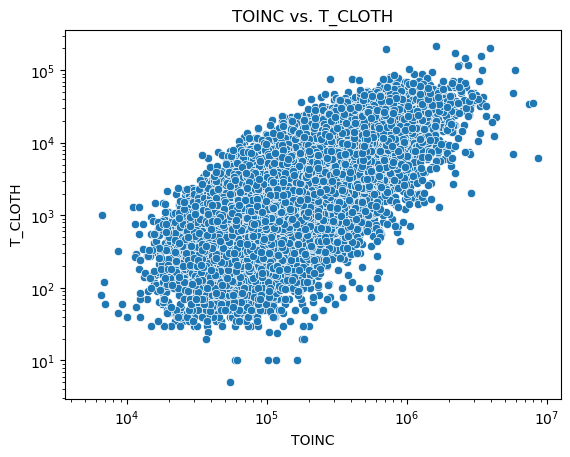

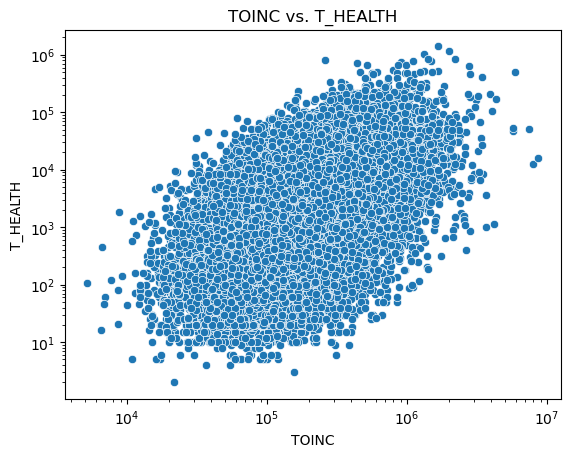

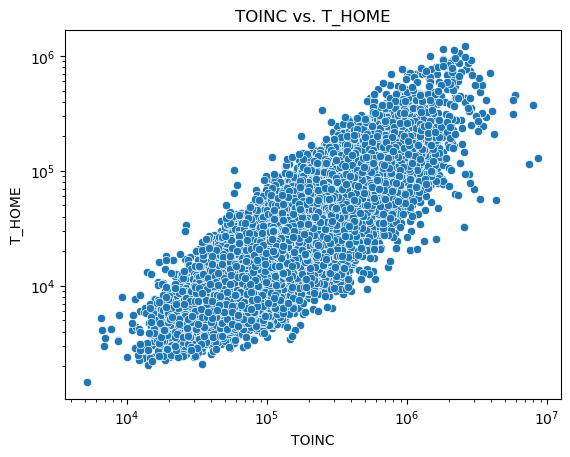

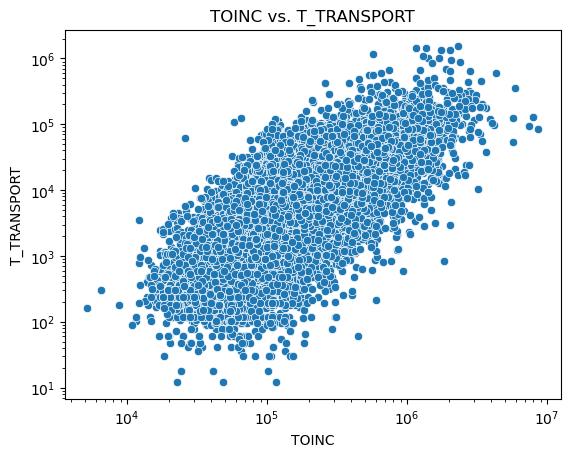

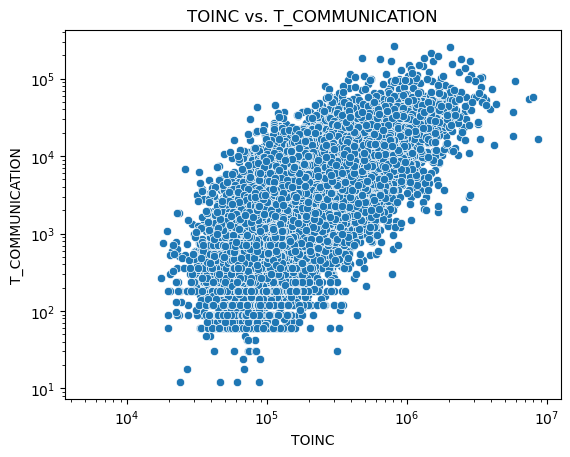

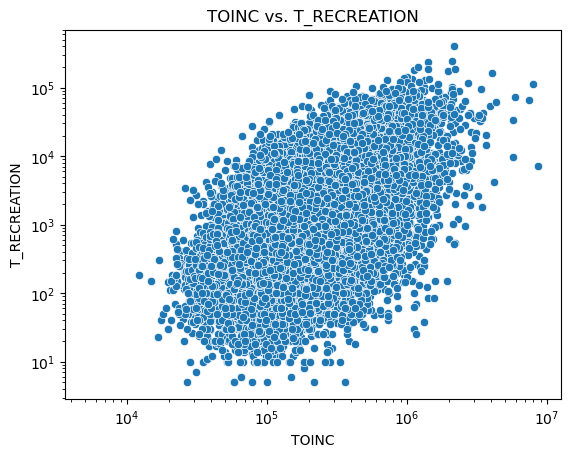

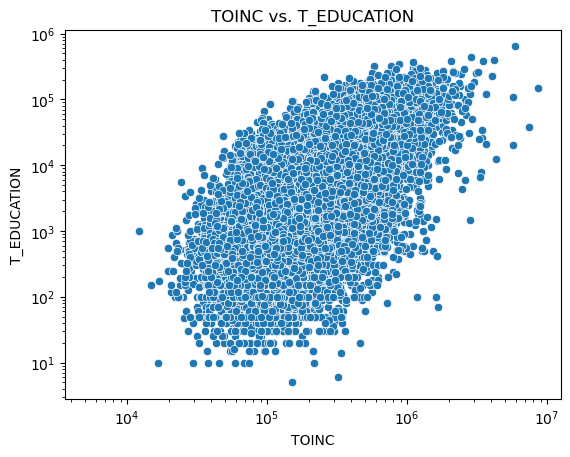

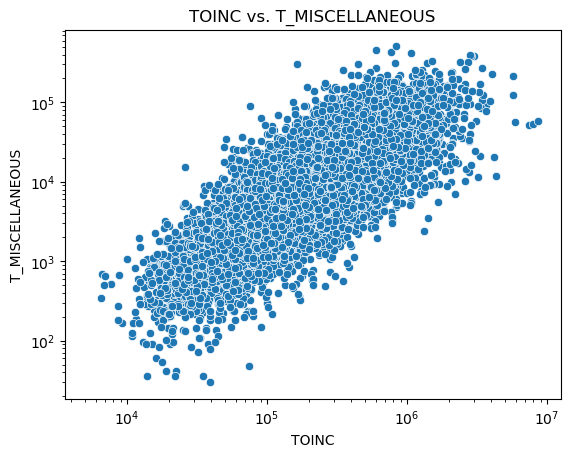

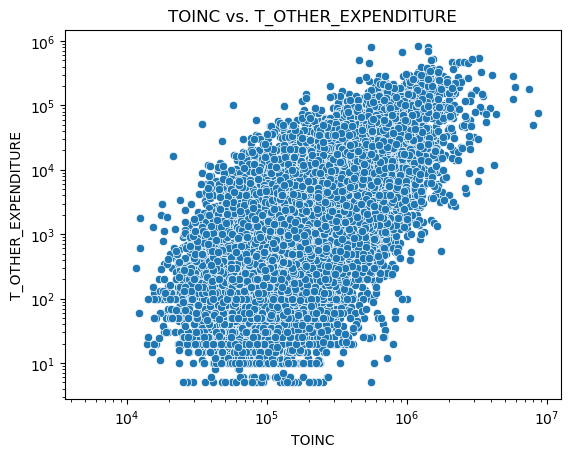

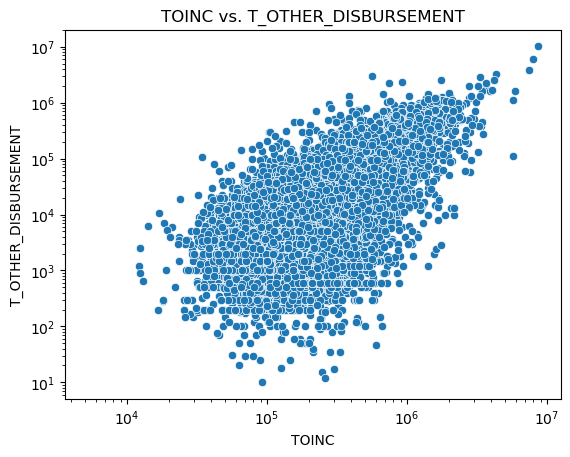

In [186]:
for attr in major_expenditure_categories.values():
    generate_scatter(df, 'TOINC', attr, log_x=True, log_y=True)

>[interpretation]

#### 5. How does housing expenditure differ between urban and rural households?

>[write stuff]

## IV. Data Mining

To be continued during phase 2.

<br>

## V. Statistical Inference

To be continued during phase 2.

<br>

## VI. Insights and Conclusions

To be continued during phase 2.

<br>

## Sources and Citations

During the preparation of this work, the authors used [NAME TOOL/SERVICE]
for the following purposes:

- [purposes]

After using this tool, the authors reviewed and edited the content as needed and takes
full responsibility for the content of the publication.